In [1]:
cd ..

/Users/wesgurnee/Documents/mechint/sparse_probing/sparse-probing


In [2]:
import torch
import re
import numpy as np
import sklearn
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import seaborn as sns
import copy

from torch.utils.data import DataLoader
import transformer_lens
import datasets

from sparse_probing_paper.load import *

from sparse_probing_paper.analysis.load_results import (
    load_probing_experiment_results, 
    make_heuristic_probing_results_df
)

from sparse_probing_paper.analysis.plots import *


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:


results_dir = '/Users/wesgurnee/Documents/mechint/sparse_probing/sparse-probing/results'
sizes = ['19m', '125m', '350m', '800m', '1.3b']
all_results = []
for s in sizes:
    results_dict = load_probing_experiment_results(results_dir, 'prefix_test', 'heuristic_sparsity_sweep', f'pythia-{s}')
    rdf = make_heuristic_probing_results_df(results_dict)
    # add model size to index of rdf
    rdf.index = pd.MultiIndex.from_tuples([
        (s, *t) for t in rdf.index.values],
        names=['model_size', 'feature', 'layer', 'k']
    )
    all_results.append(rdf)
rdf = pd.concat(all_results)

In [4]:
rdf.query('k==1').sort_values('test_pr_auc', ascending=False).head(25)

test_acc test_balanced_acc test_precision  \
model_size feature         layer k                                              
800m       starts_with_de  1     1  0.966833          0.945869       0.926233   
1.3b       starts_with_co  2     1   0.96275          0.951798       0.884952   
800m       starts_with_re  1     1  0.942833           0.89114       0.893527   
           starts_with_bi  1     1  0.980498          0.948043       0.852234   
           starts_with_ex  3     1  0.967736          0.930826       0.875853   
19m        starts_with_re  0     1  0.930667          0.909422       0.794389   
350m       starts_with_ex  10    1   0.96112          0.915677       0.852156   
19m        starts_with_de  0     1  0.935833          0.911103       0.826171   
           starts_with_co  0     1    0.9455          0.937246       0.823287   
1.3b       starts_with_un  0     1  0.915661          0.860373       0.704334   
800m       starts_with_de  7     1   0.92975          0.871879       0.868373   
350m       starts_with_de  10    1   0.92575          0.859229       0.872027   
1.3b       starts_with_out 1     1   0.97894          0.912544         0.8144   
800m       starts_with_co  3     1   0.93075          0.872108        0.86215   
1.3b       starts_with_co  6     1  0.909833          0.858271       0.772785   
           starts_with_de  12    1   0.92675          0.860462       0.875596   
800m       starts_with_co  2     1   0.92075          0.880408       0.792553   
1.3b       starts_with_de  10    1  0.906833          0.849304       0.783864   
800m       starts_with_be  1     1  0.960615          0.888619       0.862301   
           starts_with_re  5     1     0.912          0.829483        0.83198   
350m       starts_with_out 0     1  0.961798          0.952729       0.617457   
1.3b       starts_with_ex  6     1  0.908102          0.849954        0.62306   
800m       starts_with_ex  5     1  0.957404          0.910629       0.833333   
           starts_with_out 5     1  0.968067          0.913696       0.687003   
           starts_with_ex  1     1   0.95097          0.835404       0.932139   

                                   test_recall test_average_precision  \
model_size feature         layer k                                      
800m       starts_with_de  1     1    0.910387               0.861564   
1.3b       starts_with_co  2     1    0.933641               0.839395   
800m       starts_with_re  1     1    0.805838               0.758288   
           starts_with_bi  1     1    0.909535               0.782246   
           starts_with_ex  3     1    0.880658               0.787096   
19m        starts_with_re  0     1    0.874365               0.719336   
350m       starts_with_ex  10    1    0.853909               0.746968   
19m        starts_with_de  0     1    0.869246               0.744896   
           starts_with_co  0     1    0.923562               0.775523   
1.3b       starts_with_un  0     1    0.780446               0.583536   
800m       starts_with_de  7     1    0.773931               0.718311   
350m       starts_with_de  10    1     0.74664               0.702923   
1.3b       starts_with_out 1     1    0.837171               0.691489   
800m       starts_with_co  3     1    0.774885               0.712733   
1.3b       starts_with_co  6     1    0.772785               0.642279   
           starts_with_de  12    1    0.748269               0.706681   
800m       starts_with_co  2     1    0.813524               0.681761   
1.3b       starts_with_de  10    1    0.751935               0.640165   
800m       starts_with_be  1     1    0.794277               0.709269   
           starts_with_re  5     1    0.693316               0.637242   
350m       starts_with_out 0     1    0.942434               0.585341   
1.3b       starts_with_ex  6     1    0.770919               0.510599   
800m       starts_with_ex  5     1    0.847051               0.726086   
           starts_with_

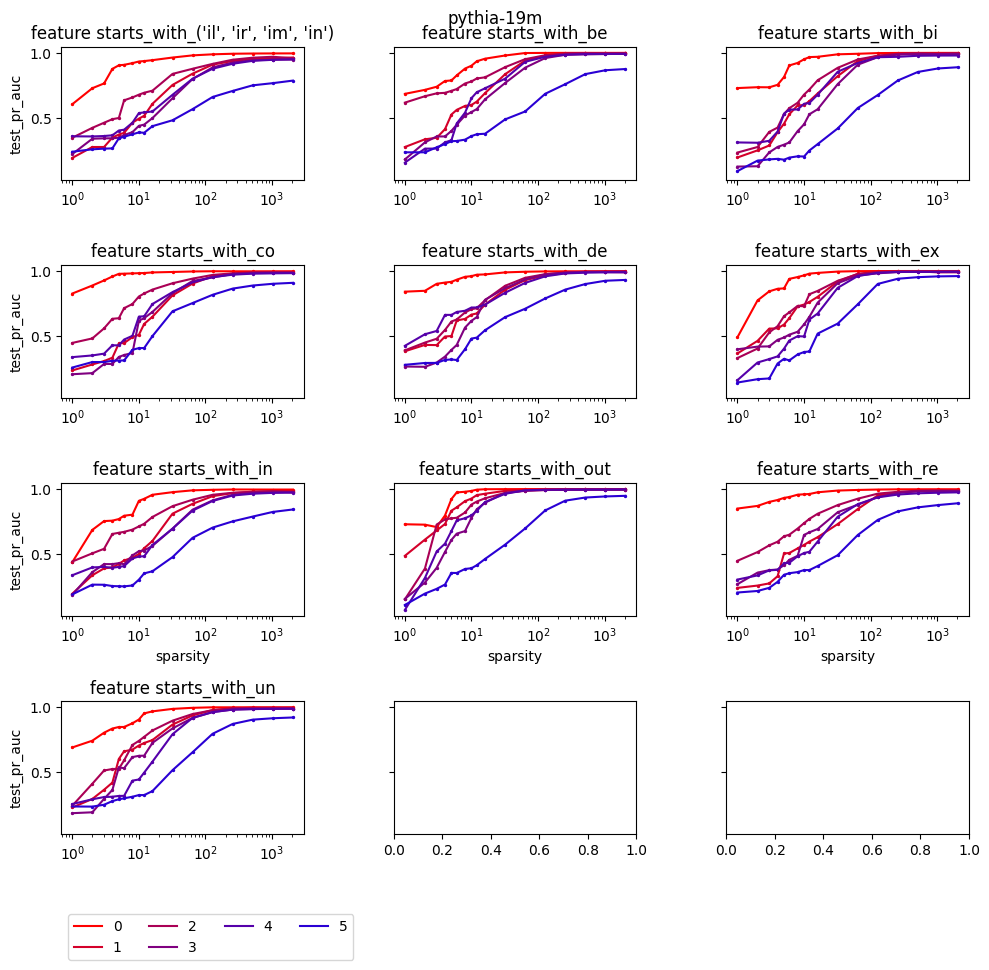

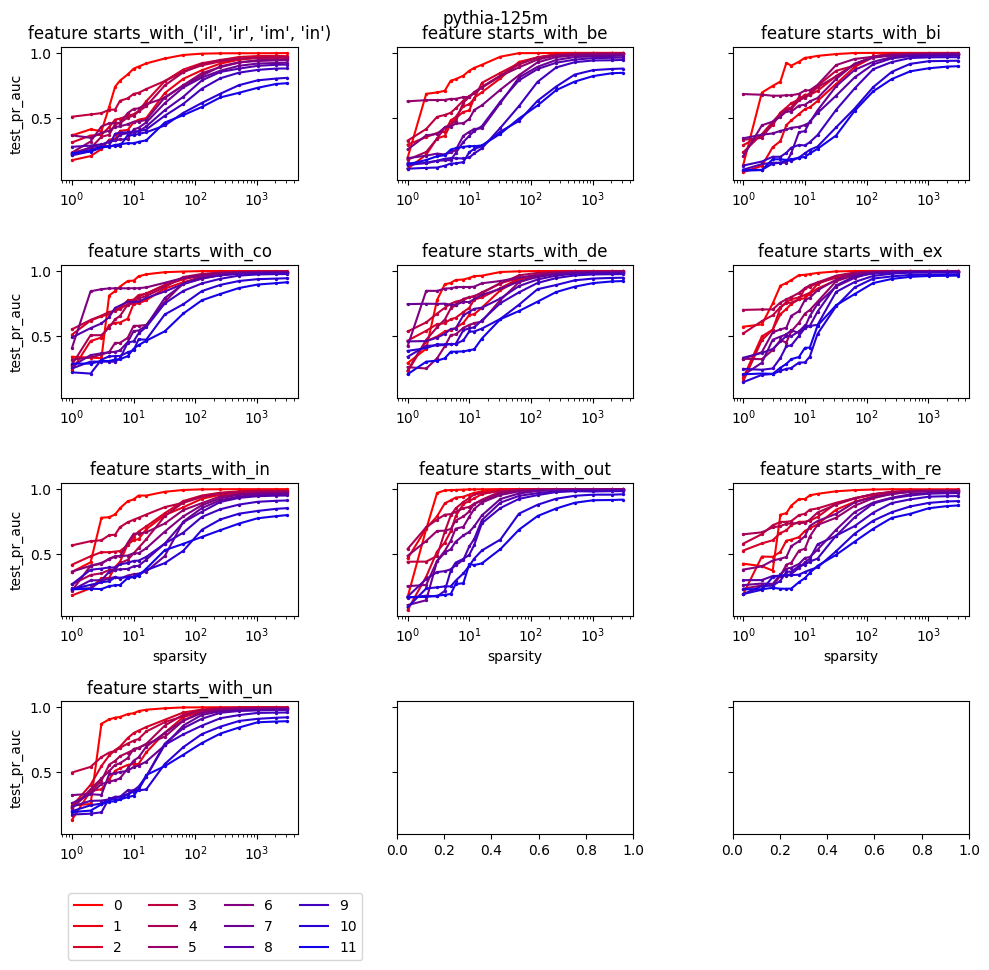

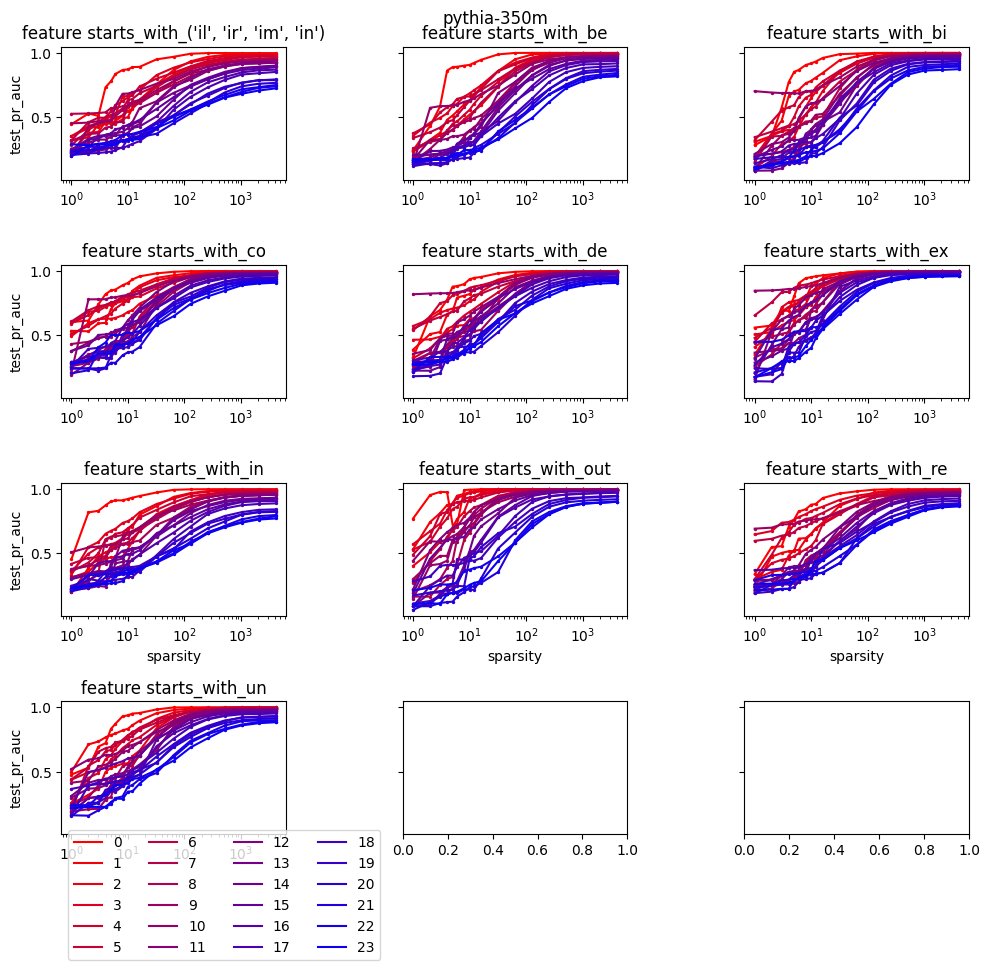

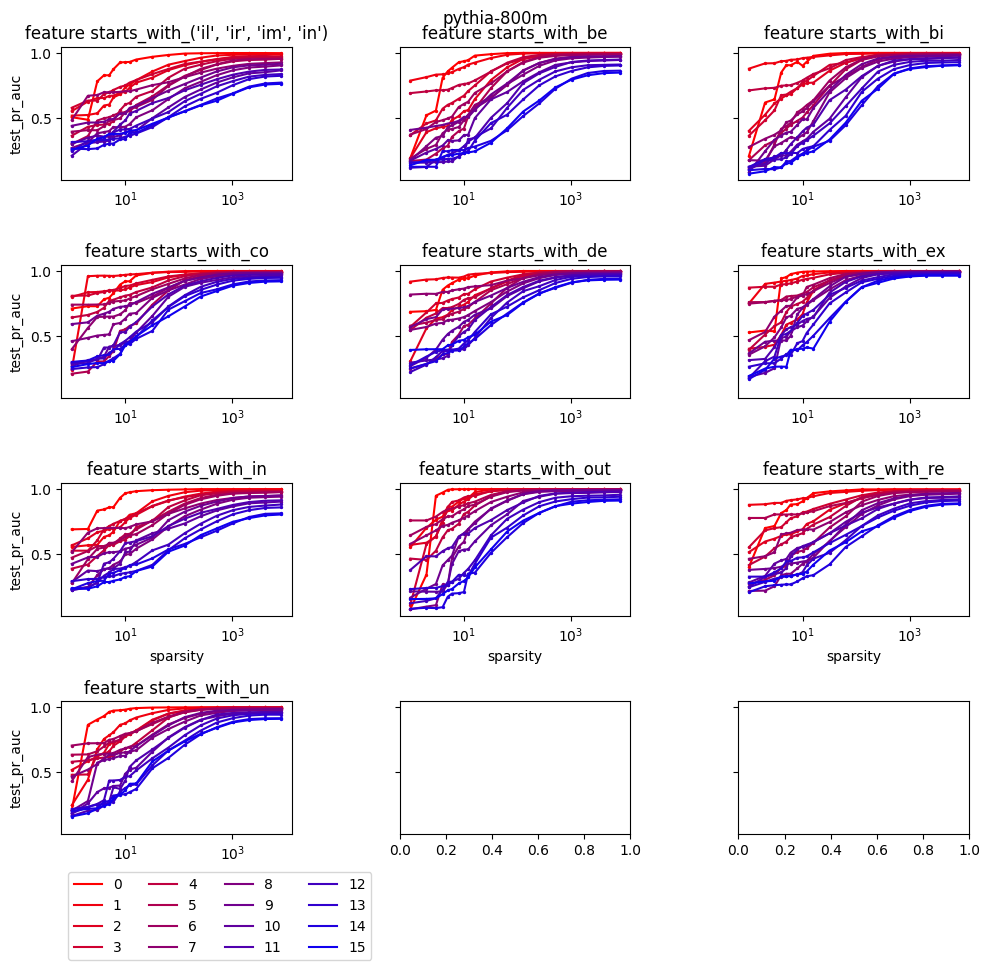

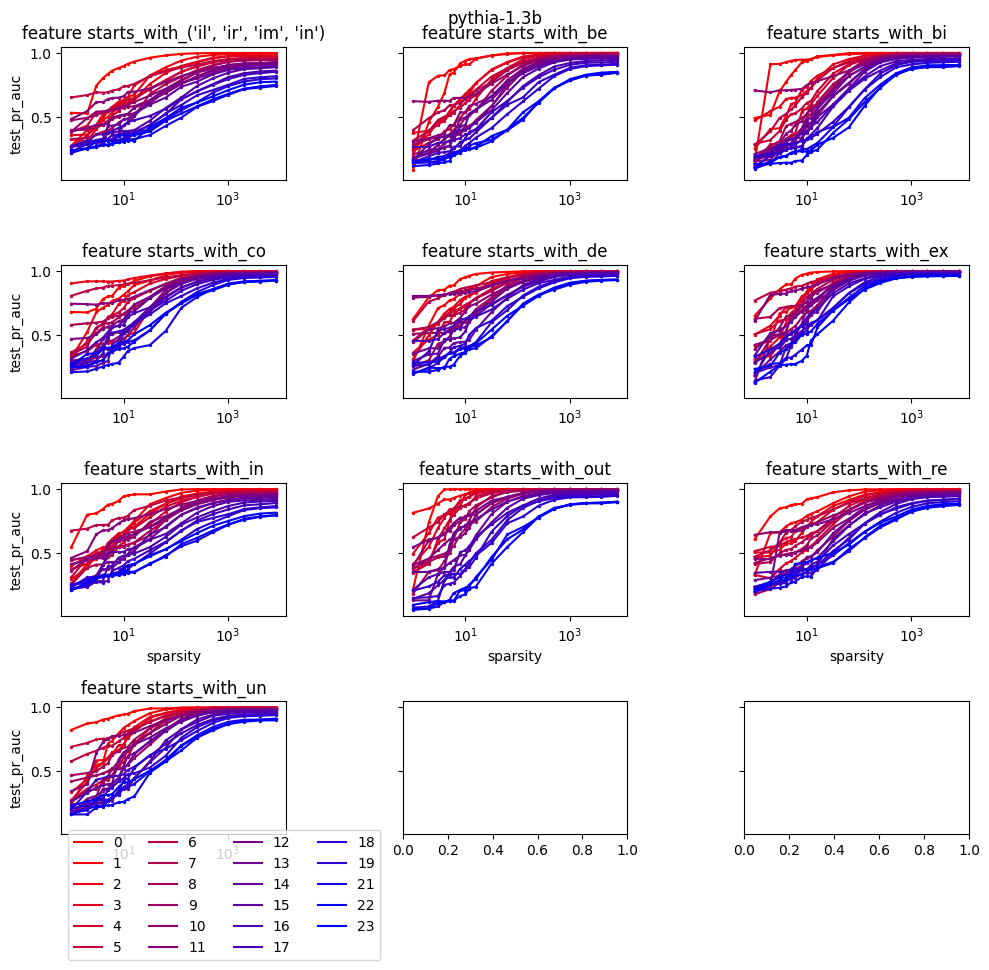

In [5]:
for s in sizes:
    plot_layer_metric_over_sparsity_per_feature(rdf.query(f'model_size=="{s}"').reset_index(level=0, drop=True), metric='test_pr_auc')
    # raise the title of the plot
    plt.suptitle(f'pythia-{s}', y=1.0)


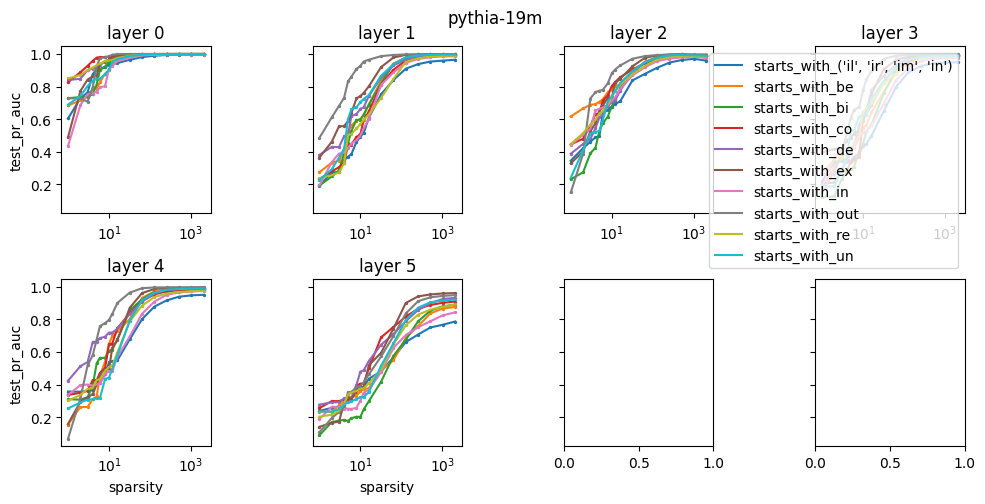

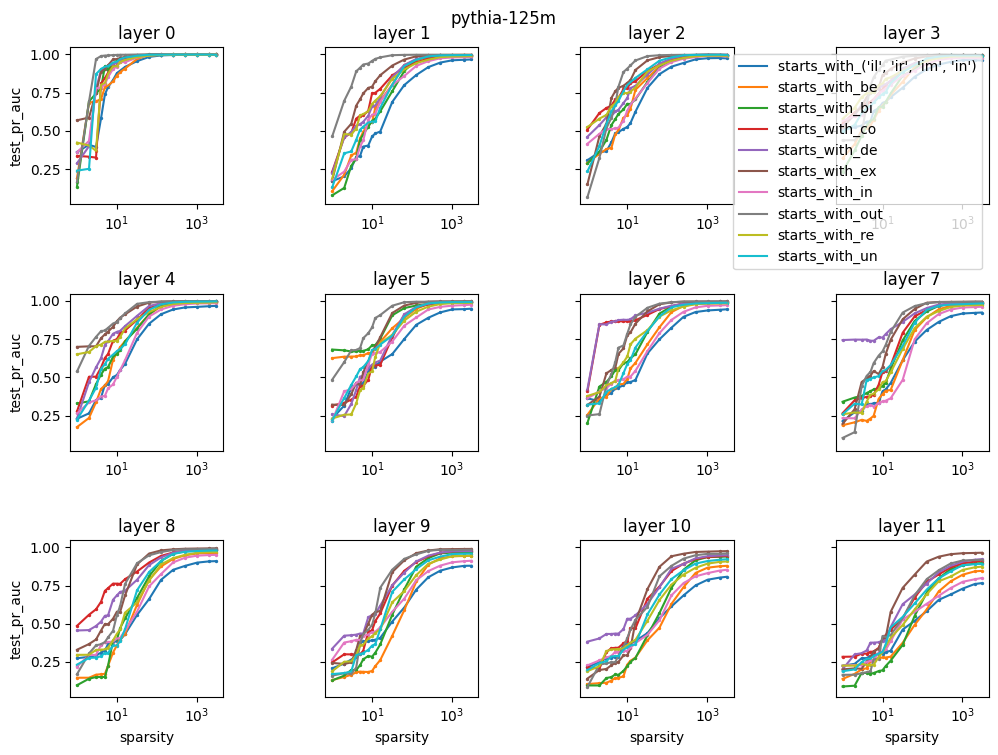

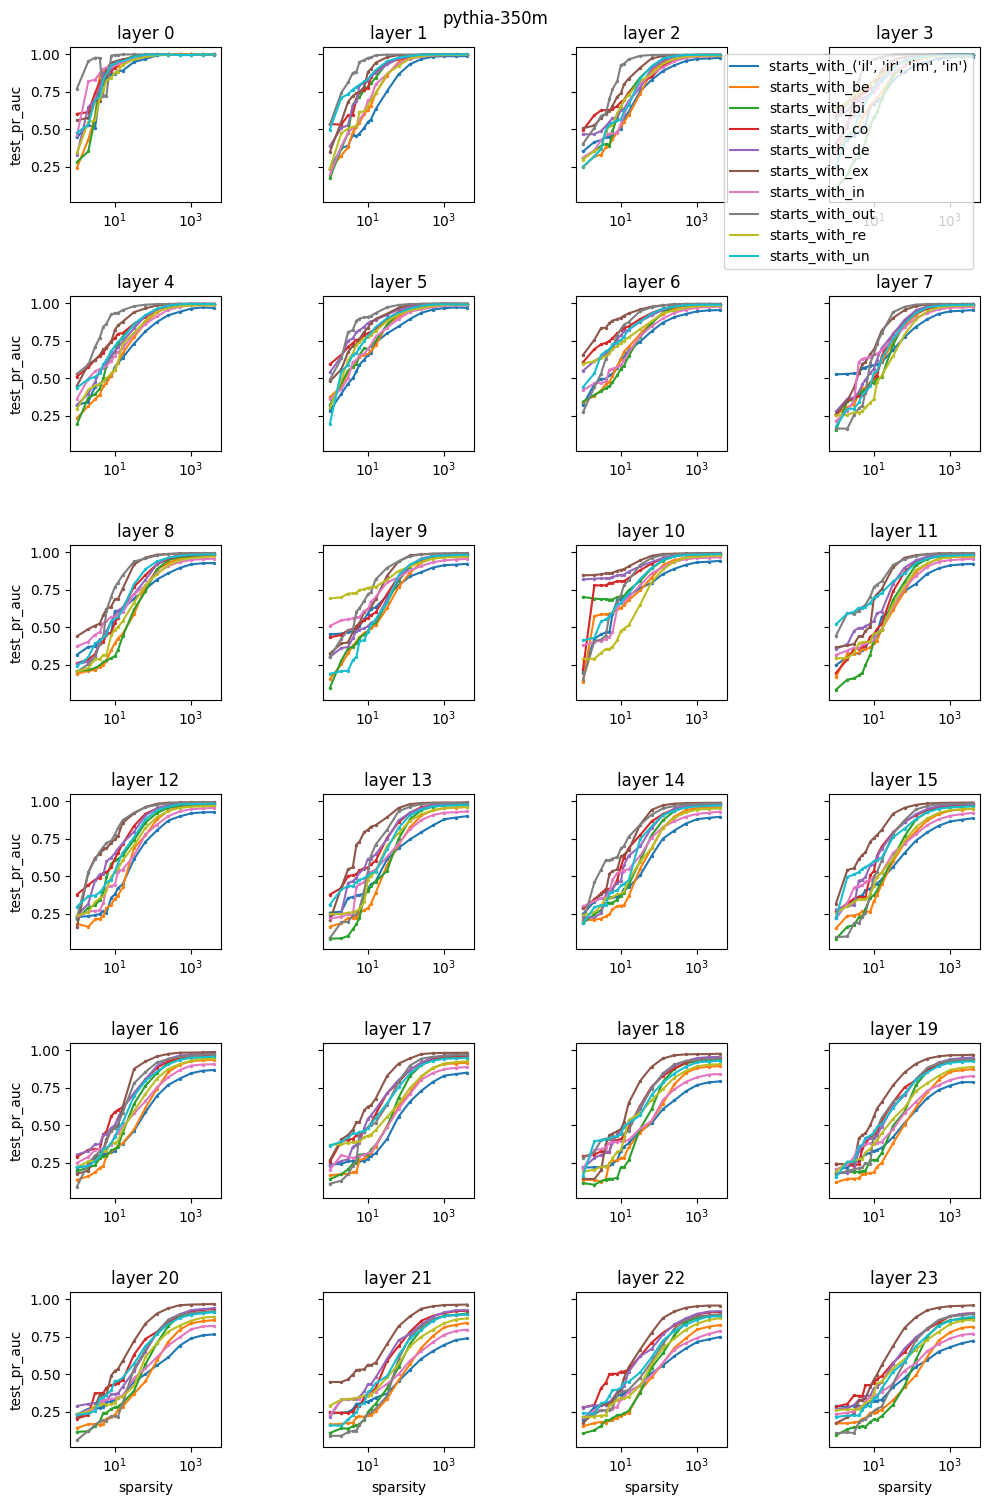

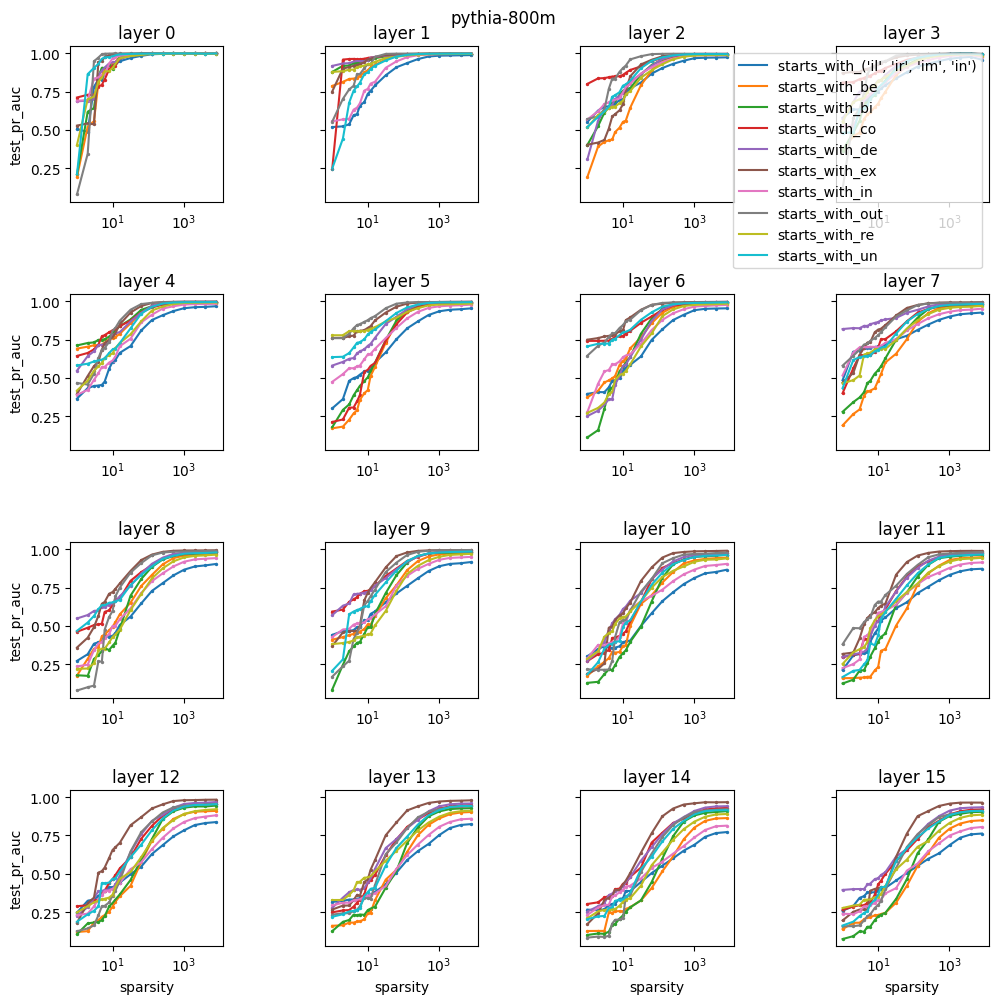

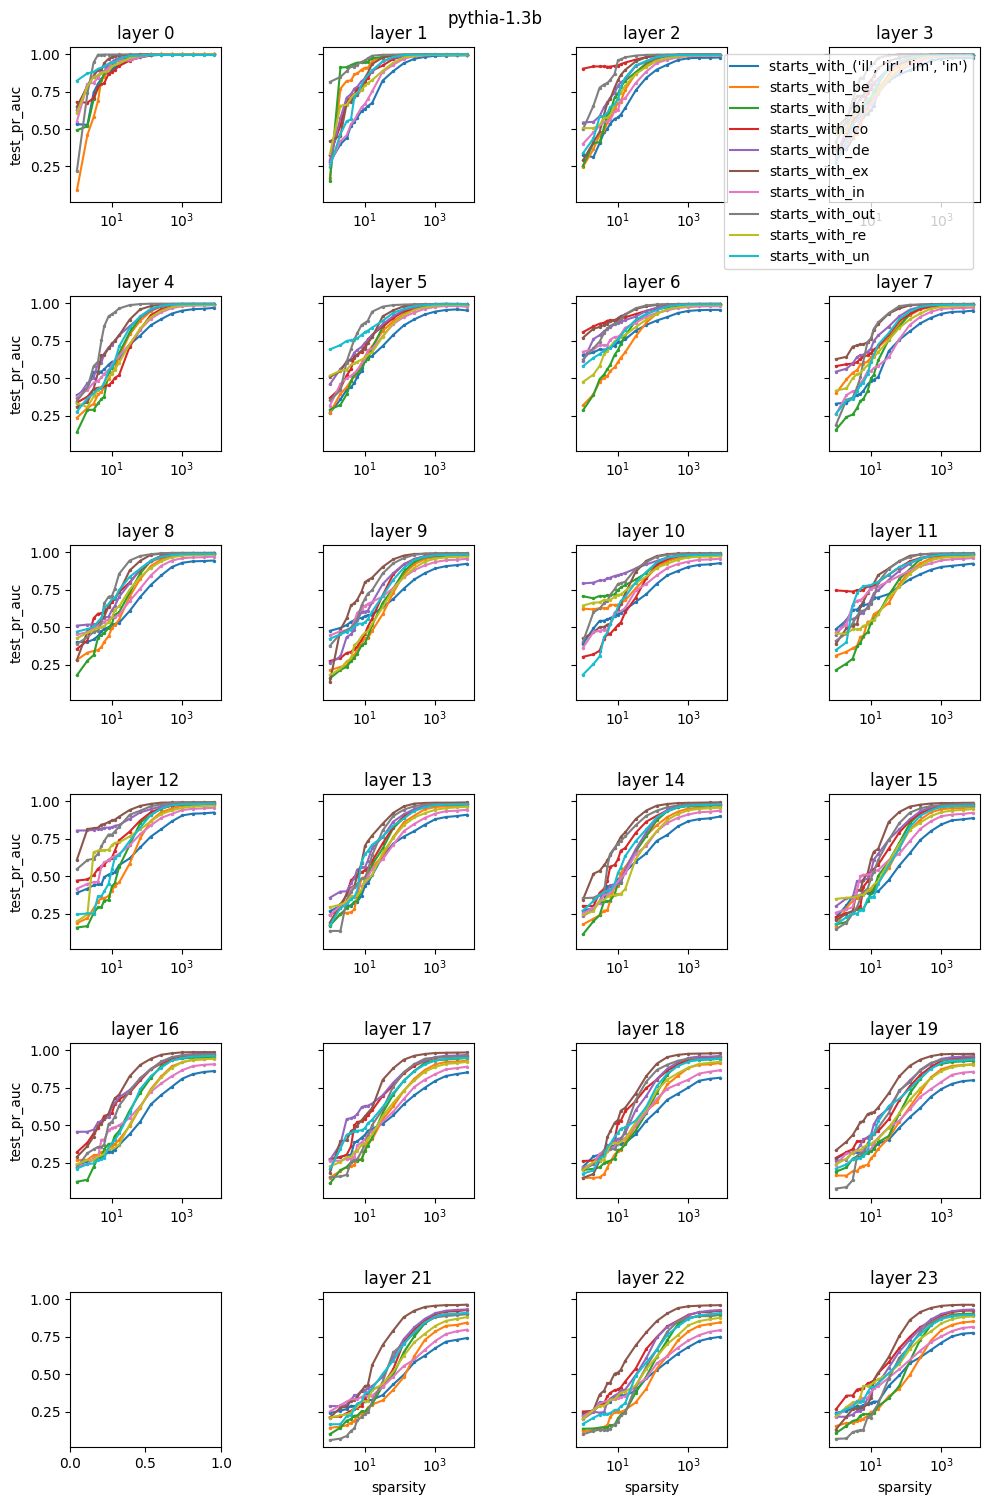

In [6]:
for s in sizes:
    plot_metric_over_sparsity_per_layer(rdf.query(f'model_size=="{s}"').reset_index(level=0, drop=True), 
    metric='test_pr_auc')
    # raise the title of the plot
    plt.suptitle(f'pythia-{s}', y=1.0)

In [9]:
one_sp.head()

NameError: name 'one_sp' is not defined

In [ ]:
n_layers = rdf.reset_index().groupby('model_size').layer.max().to_dict()

one_sp = rdf.query('k==1').sort_values('test_pr_auc', ascending=False).head(10)
# plot one_sp for each feature:
# x axis: normalized layer depth
# y axis: test_pr_auc
# color: model size
def plot_model_k_sparse_performance_by_feature_and_depth(rdf, k, metric):
    features = rdf.index.get_level_values('feature').unique()
    fig, axs = plt.subplots(math.ceil(len(features) / 3), 3, figsize=(15, 10), sharey=True)
    for ix, f in enumerate(features):
        ax = axs[ix // 3, ix % 3]
        for s in sizes:
            line = rdf.loc[s, f, :, k][metric]
            y = line.values
            x = line.index / n_layers[s]
            ax.plot(x, y, label=s)
        
        ax.set_title(f)
        ax.set_xlabel('Normalized layer depth')
        ax.set_ylabel(metric)
    ax.legend()
    plt.tight_layout()
    plt.suptitle(f'Best {k}-sparse performance by feature and depth', y=1.02)

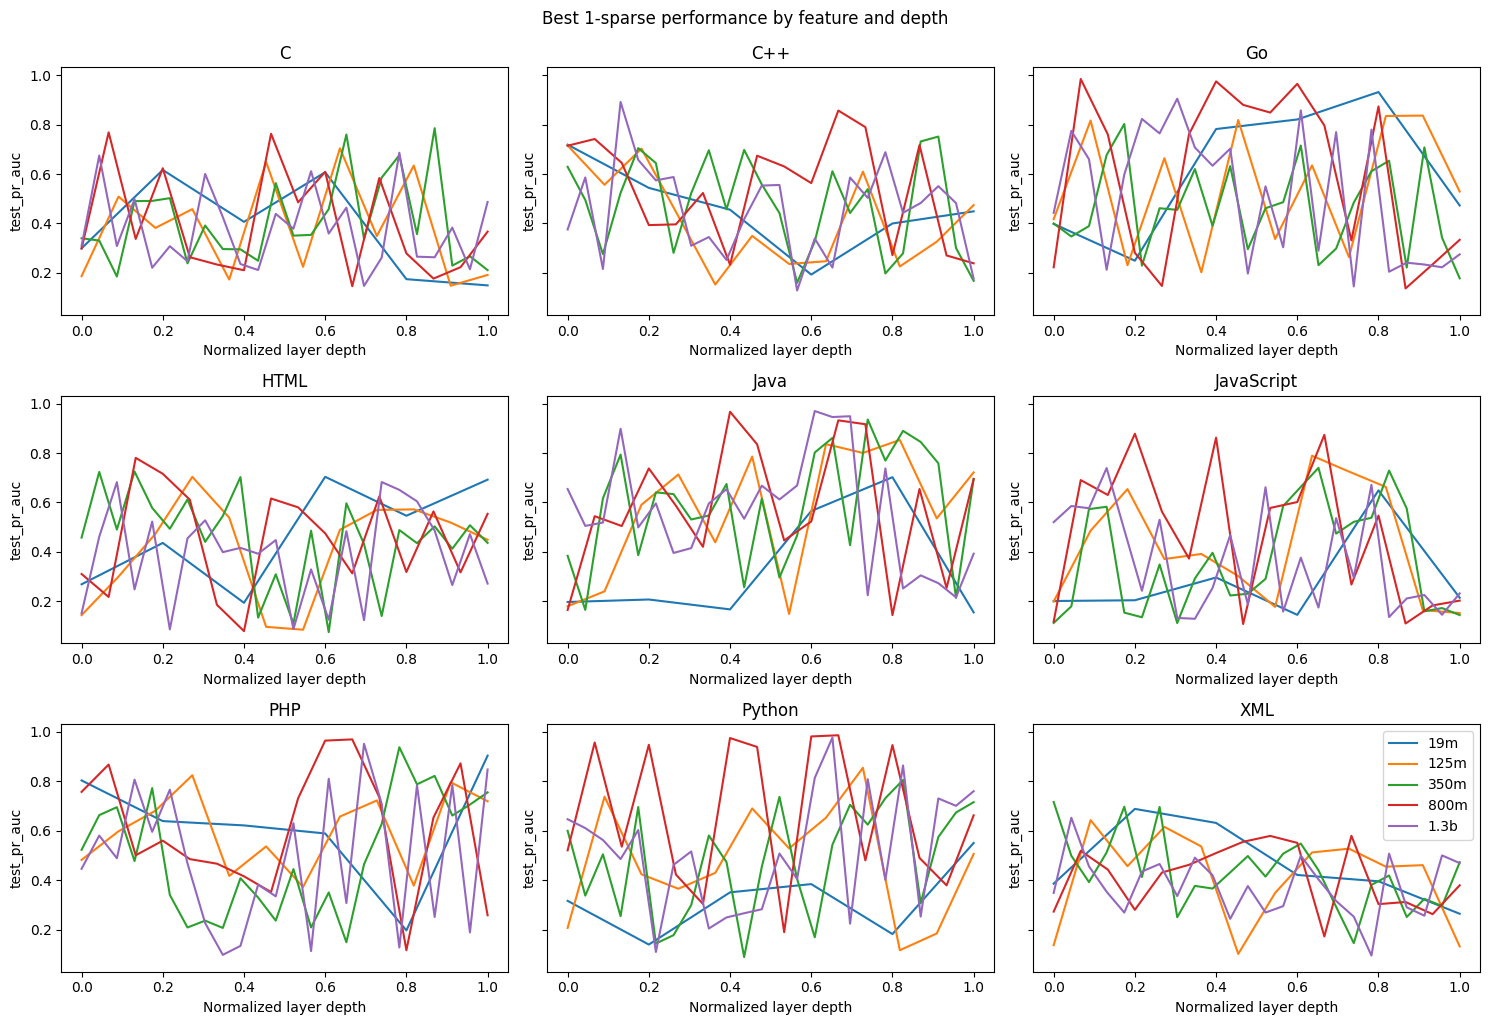

In [ ]:
plot_model_k_sparse_performance_by_feature_and_depth(rdf, 1, 'test_pr_auc')

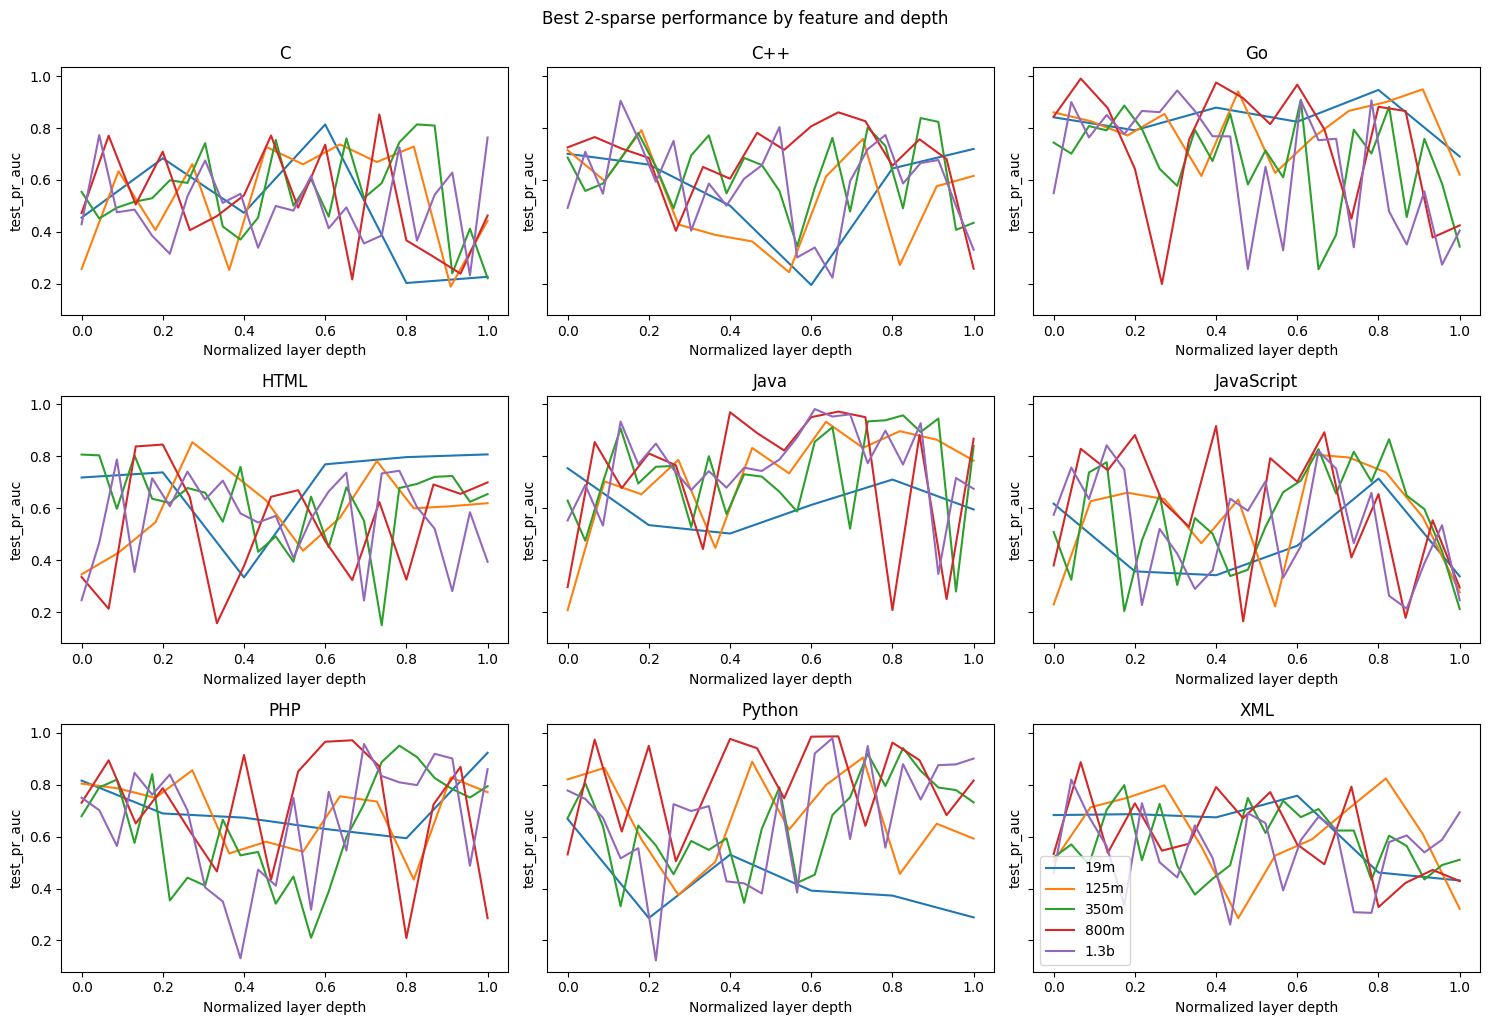

In [ ]:
plot_model_k_sparse_performance_by_feature_and_depth(rdf, 2, 'test_pr_auc')